In [1]:
import pandas as pd
import csv

In [2]:
df= pd.read_csv("Unit-Profile-sept2015.csv",index_col = None)

In [3]:
df.head()

,unit_id,isp,TECHNOLOGY,STATE,CENSUS,timezone_offset,timezone_offset_dst,Download,Upload
0,382,AT&T,UVERSE,SC,SOUTH,-5,-4,12,1
1,405,AT&T,UVERSE,IL,MIDWEST,-6,-5,6,1
2,450,AT&T,UVERSE,OH,MIDWEST,-5,-4,6,1
3,463,AT&T,UVERSE,IL,MIDWEST,-6,-5,18,1.5
4,464,AT&T,DSL,OH,MIDWEST,-5,-4,3,0.384


In [4]:
df[0:].shape

(6241, 9)

In [5]:
df.shape

(6241, 9)

In [6]:
df_curr_dlping= pd.read_csv("curr_dlping.csv",header=None,index_col = None)

In [7]:
df_curr_dlping.head()

,0,1,2,3,4,5,6,7,8,9
0,373,2015-09-04 05:20:15,samknows1.dal1.level3.net,151475,19203,171127,29006,243,0,965740
1,373,2015-09-04 05:22:30,samknows1.dal1.level3.net,154984,20320,179114,34947,234,0,965740
2,373,2015-09-04 07:21:25,samknows1.dal1.level3.net,81891,16464,170042,38316,247,0,965740
3,373,2015-09-04 09:20:06,samknows1.dal1.level3.net,151906,17094,167955,28322,217,1,965740
4,373,2015-09-04 09:22:22,samknows1.dal1.level3.net,154100,17771,170054,32022,217,0,965740


In [8]:
df_curr_dlping = df_curr_dlping.set_axis(['unit_id', 'dtime', 'target', 'rtt_avg','rtt_min','rtt_max','rtt_std','successes','failiures','location_id'], axis=1, inplace=False)

In [9]:
df_curr_dlping.head()

,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failiures,location_id
0,373,2015-09-04 05:20:15,samknows1.dal1.level3.net,151475,19203,171127,29006,243,0,965740
1,373,2015-09-04 05:22:30,samknows1.dal1.level3.net,154984,20320,179114,34947,234,0,965740
2,373,2015-09-04 07:21:25,samknows1.dal1.level3.net,81891,16464,170042,38316,247,0,965740
3,373,2015-09-04 09:20:06,samknows1.dal1.level3.net,151906,17094,167955,28322,217,1,965740
4,373,2015-09-04 09:22:22,samknows1.dal1.level3.net,154100,17771,170054,32022,217,0,965740


In [10]:
df_curr_dlping.unit_id.shape

(5033178,)

In [12]:
unit_id_list = []
for i in range(6241):
    unit_id_list.append(df.unit_id[i])

In [15]:
unit_id_extractor_list = []
for i in range(5033178):
    unit_id_extractor_list.append(df_curr_dlping.unit_id[i])

In [18]:
to_remove = []
to_remove = [item for item in unit_id_extractor_list if item not in unit_id_list]

In [19]:
to_remove=list(set(to_remove))

In [20]:
to_remove

[614148,
 800132,
 797448,
 599952,
 13105,
 6673,
 614224,
 589686,
 9048,
 9658,
 7931,
 9470]

In [21]:
for element in to_remove:
    df_curr_dlping = df_curr_dlping[df_curr_dlping.unit_id != element]

In [22]:
df_curr_dlping.shape

(5030834, 10)

In [23]:
df_curr_dlping.head()

,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failiures,location_id
0,373,2015-09-04 05:20:15,samknows1.dal1.level3.net,151475,19203,171127,29006,243,0,965740
1,373,2015-09-04 05:22:30,samknows1.dal1.level3.net,154984,20320,179114,34947,234,0,965740
2,373,2015-09-04 07:21:25,samknows1.dal1.level3.net,81891,16464,170042,38316,247,0,965740
3,373,2015-09-04 09:20:06,samknows1.dal1.level3.net,151906,17094,167955,28322,217,1,965740
4,373,2015-09-04 09:22:22,samknows1.dal1.level3.net,154100,17771,170054,32022,217,0,965740


In [24]:
df_curr_dlping['dtime'] = pd.to_datetime(df_curr_dlping['dtime'], format='%Y-%m-%d %H:%M:%S')

df_curr_dlping['Am / Pm'] = df_curr_dlping['dtime'].dt.strftime('%p')
df_curr_dlping['Day'] = df_curr_dlping['dtime'].dt.strftime('%A')

In [25]:
df_curr_dlping.tail()

,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failiures,location_id,Am / Pm,Day
5033173,812010,2015-10-31 14:39:14,samknows1.dal1.level3.net,37310,27000,45428,4146,315,1,1395472,PM,Saturday
5033174,812010,2015-10-31 16:38:05,ispmon.samknows.mlab1v4.dfw01.measurement-lab.org,36215,25701,43859,3892,352,0,1395472,PM,Saturday
5033175,812010,2015-10-31 16:38:05,samknows1.dal1.level3.net,36463,25995,43933,3904,352,0,1395472,PM,Saturday
5033176,812010,2015-10-31 20:40:53,ispmon.samknows.mlab1v4.dfw01.measurement-lab.org,35191,26783,41759,3445,352,0,1395472,PM,Saturday
5033177,812010,2015-10-31 20:40:53,samknows1.dal1.level3.net,35399,26511,42269,3480,352,0,1395472,PM,Saturday


In [26]:
df_curr_dlping.shape

(5030834, 12)

In [27]:
combined_df = pd.merge(df, df_curr_dlping, on="unit_id")

In [218]:
combined_df.head()

,unit_id,isp,TECHNOLOGY,STATE,CENSUS,timezone_offset,timezone_offset_dst,Download,Upload,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failiures,location_id,Am / Pm,Day
0,382,AT&T,UVERSE,SC,SOUTH,-5,-4,12,1,2015-09-04 06:28:46,samknows1.wdc12.level3.net,115081,38203,244663,44783,243,101,836802,AM,Friday
1,382,AT&T,UVERSE,SC,SOUTH,-5,-4,12,1,2015-09-04 06:31:07,samknows1.wdc12.level3.net,129730,38743,263600,33178,346,9,836802,AM,Friday
2,382,AT&T,UVERSE,SC,SOUTH,-5,-4,12,1,2015-09-04 08:30:01,samknows1.wdc12.level3.net,134905,40444,327317,41582,349,6,836802,AM,Friday
3,382,AT&T,UVERSE,SC,SOUTH,-5,-4,12,1,2015-09-04 10:29:12,samknows1.wdc12.level3.net,129683,39056,253122,34148,343,11,836802,AM,Friday
4,382,AT&T,UVERSE,SC,SOUTH,-5,-4,12,1,2015-09-04 10:31:28,samknows1.wdc12.level3.net,162189,39219,481962,82638,352,5,836802,AM,Friday


In [29]:
combined_df.shape

(5030834, 20)

In [223]:
df_curr_dlping.shape

(5030834, 12)

In [1]:
# download - uploa os in Mega bits per second
# box plot with the technology wrt test

In [220]:
combined_df.columns

Index(['unit_id', 'isp', 'TECHNOLOGY', 'STATE', 'CENSUS', 'timezone_offset',
       'timezone_offset_dst', 'Download', 'Upload', 'dtime', 'target',
       'rtt_avg', 'rtt_min', 'rtt_max', 'rtt_std', 'successes', 'failiures',
       'location_id', 'Am / Pm', 'Day'],
      dtype='object')

In [35]:
combined_df.TECHNOLOGY.unique()

array(['UVERSE', 'DSL', 'REMOVE', 'MISC', 'CABLE', 'FIBER', 'SATELLITE'],
      dtype=object)

In [219]:
combined_df.to_csv('df_curr_dlping.csv', encoding='utf-8', index=False)

In [33]:
graph_technology_time_dlping=combined_df[['unit_id','TECHNOLOGY','STATE','rtt_avg','Am / Pm','Day']]

In [36]:
graph_technology_time_dlping.STATE.unique()

array(['SC', 'IL', 'OH', 'CA', 'MI', 'TX', 'GA', 'IN', 'AL', 'NC', 'FL',
       'AR', 'TN', 'WI', 'MO', 'PA', 'DC', 'KY', 'CT', 'KS', 'OK', 'LA',
       'MS', 'NV', 'MD', 'UNKNOWN', 'NY', 'Tx', 'AZ', 'NM', 'ID', 'NJ',
       'VA', 'UT', 'IA', 'MN', 'OR', 'WA', 'CO', 'MT', 'ND', 'SD', 'WY',
       'NE', 'MA', 'NH', 'DE', 'ME', 'WV', 'VT', 'RI', 'Wi', 'HI', 'Ma'],
      dtype=object)

In [37]:
graph_technology_time_dlping = graph_technology_time_dlping[graph_technology_time_dlping.STATE != 'UNKNOWN']

In [38]:
graph_technology_time_dlping = graph_technology_time_dlping[graph_technology_time_dlping.STATE != 'HI']

In [45]:
graph_technology_time_dlping.head()

,unit_id,TECHNOLOGY,STATE,rtt_avg,Am / Pm,Day
0,382,UVERSE,SC,115081,AM,Friday
1,382,UVERSE,SC,129730,AM,Friday
2,382,UVERSE,SC,134905,AM,Friday
3,382,UVERSE,SC,129683,AM,Friday
4,382,UVERSE,SC,162189,AM,Friday


In [44]:
len(graph_technology_time_dlping.STATE.unique())

52

In [40]:
graph_technology_time_dlping.plot()

In [61]:
graph_technology_time_dlping.shape

(4904425, 6)

In [41]:
import matplotlib.pylab as plt
%matplotlib inline

In [48]:
import numpy as np

In [54]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(graph_technology_time_dlping.STATE.unique()))
    plt.bar(graph_technology_time_dlping.STATE.unique(), graph_technology_time_dlping.rtt_avg)
    plt.xlabel('STATE', fontsize=5)
    plt.ylabel('Rtt_avg', fontsize=5)
    plt.yticks(index, graph_technology_time_dlping.STATE.unique(), fontsize=5, rotation=30)
    plt.title('Rtt_average per state')
    plt.show()

In [57]:
graph_technology_time_dlping_monday_AM = graph_technology_time_dlping[graph_technology_time_dlping['Am / Pm'] != 'PM']

In [59]:
graph_technology_time_dlping_monday_AM = graph_technology_time_dlping[graph_technology_time_dlping['Day'] == 'Monday']

In [60]:
graph_technology_time_dlping_monday_AM.shape

(647026, 6)

In [62]:
graph_technology_time_dlping_monday_AM.head()

,unit_id,TECHNOLOGY,STATE,rtt_avg,Am / Pm,Day
48,382,UVERSE,SC,135134,AM,Monday
49,382,UVERSE,SC,122785,AM,Monday
50,382,UVERSE,SC,132223,AM,Monday
51,382,UVERSE,SC,134575,AM,Monday
102,382,UVERSE,SC,125831,AM,Monday


In [63]:
graph_technology_time_dlping_monday_AM.rtt_avg.sum()

132635419584

In [65]:
graph_technology_time_dlping_monday_AM.rtt_avg.shape

(647026,)

In [66]:
132635419584/647026

204992.4107902928

In [85]:

state_list=graph_technology_time_dlping_monday_AM['STATE'].unique()

    

In [167]:
monday_AM_dlping = pd.DataFrame(columns=['STATE','rtt_avg'])


In [168]:
graph_technology_time_dlping_monday_AM.TECHNOLOGY.unique()

array(['UVERSE', 'DSL', 'REMOVE', 'MISC', 'CABLE', 'FIBER', 'SATELLITE'],
      dtype=object)

In [169]:
monday_AM_dlping_UVERSE=graph_technology_time_dlping_monday_AM[graph_technology_time_dlping['TECHNOLOGY'] == 'UVERSE']

C:\Users\Ishmita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [170]:
monday_AM_dlping_UVERSE.rtt_avg.sum()

4189418899

In [171]:
monday_AM_dlping_UVERSE.rtt_avg.shape

(53990,)

In [172]:
4189418899/53990

77596.20112983885

In [173]:
monday_AM_dlping_UVERSE_rtt_avg=77596

In [174]:
monday_AM_dlping = pd.DataFrame(columns=['TECHNOLOGY','rtt_avg'])


In [175]:

monday_AM_dlping = monday_AM_dlping.append({'TECHNOLOGY': 'UVERSE','rtt_avg': 77596}, ignore_index=True)

In [176]:
monday_AM_dlping.head()

,TECHNOLOGY,rtt_avg
0,UVERSE,77596


In [177]:
monday_AM_dlping_DSL=graph_technology_time_dlping_monday_AM[graph_technology_time_dlping['TECHNOLOGY'] == 'DSL']

C:\Users\Ishmita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [178]:
rtt_avg_sum=monday_AM_dlping_DSL.rtt_avg.sum()


In [179]:
monday_AM_dlping_DSL.rtt_avg.shape

(113331,)

In [180]:
rtt_avg_sum/113331

296998.1011726712

In [181]:
monday_AM_dlping = monday_AM_dlping.append({'TECHNOLOGY': 'DSL','rtt_avg': 296998}, ignore_index=True)

In [182]:
monday_AM_dlping.head()

,TECHNOLOGY,rtt_avg
0,UVERSE,77596
1,DSL,296998


In [183]:
monday_AM_dlping_CABLE=graph_technology_time_dlping_monday_AM[graph_technology_time_dlping['TECHNOLOGY'] == 'CABLE']
rtt_avg_sum=monday_AM_dlping_CABLE.rtt_avg.sum()

C:\Users\Ishmita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [184]:
monday_AM_dlping_CABLE.rtt_avg.shape

(308421,)

In [185]:
rtt_avg_sum/308421

209229.7350926169

In [186]:
monday_AM_dlping = monday_AM_dlping.append({'TECHNOLOGY': 'CABLE','rtt_avg': 209229}, ignore_index=True)

In [187]:
monday_AM_dlping.head()

,TECHNOLOGY,rtt_avg
0,UVERSE,77596
1,DSL,296998
2,CABLE,209229


In [188]:
monday_AM_dlping_FIBER=graph_technology_time_dlping_monday_AM[graph_technology_time_dlping['TECHNOLOGY'] == 'FIBER']
rtt_avg_sum=monday_AM_dlping_FIBER.rtt_avg.sum()

C:\Users\Ishmita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [189]:
rtt_avg_sum=monday_AM_dlping_FIBER.rtt_avg.sum()

In [190]:
monday_AM_dlping_FIBER.rtt_avg.shape

(65621,)

In [191]:
rtt_avg_sum/65621

124211.83354413984

In [192]:
monday_AM_dlping = monday_AM_dlping.append({'TECHNOLOGY': 'FIBER','rtt_avg': 124211}, ignore_index=True)

In [193]:
monday_AM_dlping_SATELLITE=graph_technology_time_dlping_monday_AM[graph_technology_time_dlping['TECHNOLOGY'] == 'SATELLITE']
rtt_avg_sum=monday_AM_dlping_SATELLITE.rtt_avg.sum()

C:\Users\Ishmita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [194]:
monday_AM_dlping_SATELLITE.rtt_avg.shape

(8219,)

In [195]:
monday_AM_dlping_SATELLITE.shape

(8219, 6)

In [196]:
rtt_avg_sum/8219

705927.301739871

In [197]:
monday_AM_dlping = monday_AM_dlping.append({'TECHNOLOGY': 'SATELLITE','rtt_avg': 705927}, ignore_index=True)

In [198]:
monday_AM_dlping

,TECHNOLOGY,rtt_avg
0,UVERSE,77596
1,DSL,296998
2,CABLE,209229
3,FIBER,124211
4,SATELLITE,705927


In [204]:
monday_AM_dlping['rtt_avg']=monday_AM_dlping['rtt_avg']/1000

rtt_average is in mili seconds

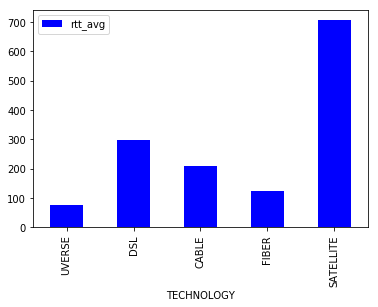

In [217]:
monday_AM_dlping.plot(kind='bar',x='TECHNOLOGY', y='rtt_avg',color ='blue')

In [211]:
satellites have more rtt because of obvious reasons

SyntaxError: invalid syntax (<ipython-input-211-03ebc92a268f>, line 1)

In [200]:
monday_AM_dlping['TECHNOLOGY']

0       UVERSE
1          DSL
2        CABLE
3        FIBER
4    SATELLITE
Name: TECHNOLOGY, dtype: object

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

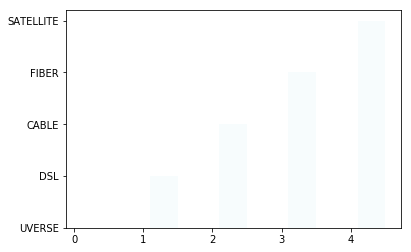

In [203]:
columns = monday_AM_dlping['TECHNOLOGY']
rows =  monday_AM_dlping['rtt_avg']

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(columns)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index,  monday_AM_dlping['TECHNOLOGY'], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset +  monday_AM_dlping['TECHNOLOGY']
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()